# Ensemble Methods III - Random Forests and Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

## Loading Moons Dataset

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=1000, noise=0.15)

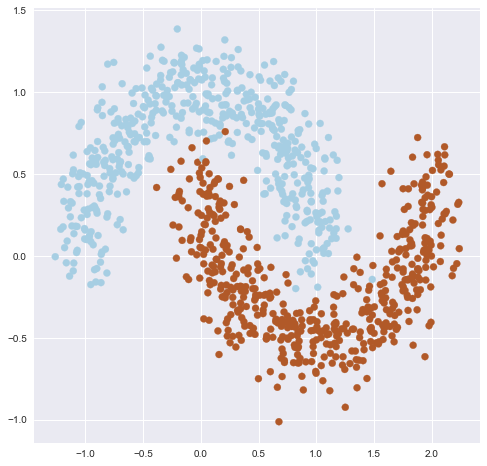

In [4]:
plt.figure(figsize=(8,8))

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Examining Random Forests on Training Set

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
y_pred=rnd_clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print(rnd_clf.__class__.__name__, accuracy_score(y_test,y_pred))

RandomForestClassifier 0.993333333333


## Examining Ada Boost on Training Set

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [11]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm = 'SAMME.R', learning_rate = 0.5)

In [12]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [13]:
y_pred=ada_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print(ada_clf.__class__.__name__, accuracy_score(y_test,y_pred))

AdaBoostClassifier 0.973333333333
